# Load Library and Data

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

from datetime import timedelta
from sklearn.metrics import silhouette_score, silhouette_samples
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('OnlineRetail.csv', encoding= 'unicode_escape')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
388429,570428,23173,REGENCY TEAPOT ROSES,2.0,10/10/2011 14:02,9.95,15553.0,United Kingdom
388430,570428,23175,REGENCY MILK JUG PINK,4.0,10/10/2011 14:02,3.25,15553.0,United Kingdom
388431,570428,22072,RED RETROSPOT TEA CUP AND SAUCER,2.0,10/10/2011 14:02,3.75,15553.0,United Kingdom
388432,570428,23173,REGENCY TEAPOT ROSES,1.0,10/10/2011 14:02,9.95,15553.0,United Kingdom


# Cleaning Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388434 entries, 0 to 388433
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    388434 non-null  object 
 1   StockCode    388434 non-null  object 
 2   Description  387125 non-null  object 
 3   Quantity     388433 non-null  float64
 4   InvoiceDate  388433 non-null  object 
 5   UnitPrice    388433 non-null  float64
 6   CustomerID   287993 non-null  float64
 7   Country      388433 non-null  object 
dtypes: float64(3), object(5)
memory usage: 23.7+ MB


In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,388433.000000,388433.000000,287993.000000
mean,9.842585,4.742679,15278.515019
std,177.557715,105.101467,1716.501125
min,-74215.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13875.000000
50%,3.000000,2.100000,15152.000000
75%,11.000000,4.130000,16782.000000
max,74215.000000,38970.000000,18287.000000


There are data with a number of quantity and unit price below 0. This is not making any sense and the data should be dropped

In [6]:
df[df.columns].nunique()

InvoiceNo      19574
StockCode       3929
Description     4029
Quantity         603
InvoiceDate    17681
UnitPrice       1413
CustomerID      3777
Country           37
dtype: int64

In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1309
Quantity            1
InvoiceDate         1
UnitPrice           1
CustomerID     100441
Country             1
dtype: int64

In [8]:
#removing missing data
df = df[df['CustomerID'].notnull()]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6.0,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8.0,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6.0,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
388428,570428,72586,SET OF 6 HALLOWEEN GHOST T-LIGHTS,1.0,10/10/2011 14:02,0.42,15553.0,United Kingdom
388429,570428,23173,REGENCY TEAPOT ROSES,2.0,10/10/2011 14:02,9.95,15553.0,United Kingdom
388430,570428,23175,REGENCY MILK JUG PINK,4.0,10/10/2011 14:02,3.25,15553.0,United Kingdom
388431,570428,22072,RED RETROSPOT TEA CUP AND SAUCER,2.0,10/10/2011 14:02,3.75,15553.0,United Kingdom


In [9]:
#remove the data that has negative value on unitprice and quantity
df = df[df['UnitPrice']>0]
df = df[df['Quantity']>0] 

In [10]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,281152.000000,281152.000000,281152.000000
mean,13.546149,3.154906,15284.662460
std,146.967335,21.035946,1716.412797
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13883.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16791.000000
max,74215.000000,8142.750000,18287.000000


There are quantity data that is not making any sense. It is unbelievable that online retail store has a customer who order with a 80000 quantity

In [11]:
df['Quantity'].sort_values(ascending=False).head(20)

61619     74215.0
206121     4300.0
97432      3906.0
270885     3186.0
52711      3114.0
160546     3114.0
4945       2880.0
291249     2880.0
201149     2700.0
80742      2592.0
87631      2400.0
32671      2400.0
91772      2400.0
125282     2160.0
311391     2000.0
160545     2000.0
177702     2000.0
52710      2000.0
348317     1944.0
348318     1944.0
Name: Quantity, dtype: float64

We can drop the data with a quantity >10000

In [12]:
df = df[df['Quantity']<10000]

In [13]:
df[df['UnitPrice']>650]['Description'].unique()

array(['Manual', 'POSTAGE', 'DOTCOM POSTAGE'], dtype=object)

In [14]:
df[df['UnitPrice']>600]['Description'].unique()

array(['Manual', 'POSTAGE', 'PICNIC BASKET WICKER 60 PIECES',
       'DOTCOM POSTAGE'], dtype=object)

In [15]:
df[df['UnitPrice']>650]['StockCode'].unique()

array(['M', 'POST', 'DOT'], dtype=object)

In [16]:
df[df['UnitPrice']>600]['StockCode'].unique()

array(['M', 'POST', '22502', 'DOT'], dtype=object)

We will drop data with unitprice > 650 to remove 'Manual', 'Postage', and 'DOTCOM POSTAGE' from Description column and 'M', 'POST', and 'DOT' from StockCode column

In [17]:
df = df[df['UnitPrice']<650]

# Pre-processing Data

In [18]:
#changing data types
df[['InvoiceNo', 'StockCode', 'Description', 'Country']] = df[['InvoiceNo', 'StockCode', 'Description', 'Country']].astype(str)
df[['Quantity', 'CustomerID']] = df[['Quantity', 'CustomerID']].astype(int)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')
df['UnitPrice']   = pd.to_numeric(df['UnitPrice'])

In [19]:
print('There are {:,} Invoice and {:,} Customers'.format(len(df['InvoiceNo'].value_counts()), len(df['CustomerID'].value_counts())))

There are 13,725 Invoice and 3,735 Customers


In [20]:
# Data Timeframe
print('We have a data transaction from {} \n  \t\t\t     to {}'.format(df['InvoiceDate'].min(),df['InvoiceDate'].max()))

We have a data transaction from 2010-12-01 08:26:00 
  			     to 2011-10-10 14:02:00


In [21]:
#create a new column total price
df['Total Price'] = df['Quantity'] * df['UnitPrice']

In [22]:
data_orders = df.groupby(['InvoiceNo', 'InvoiceDate', 'CustomerID'])[['Quantity', 'Total Price']].agg('sum').reset_index().rename(columns={'Quantity':'Total Quantity'})

In [23]:
# We simulate that today is the day after the last transaction date
NOW = data_orders['InvoiceDate'].max() + timedelta(days=1)
NOW

Timestamp('2011-10-11 14:02:00')

In [24]:
data_orders['DaysSinceOrder'] = (NOW - data_orders['InvoiceDate']).dt.days

In [25]:
data_orders

,InvoiceNo,InvoiceDate,CustomerID,Total Quantity,Total Price,DaysSinceOrder
0,536365,2010-12-01 08:26:00,17850,40,139.12,314
1,536366,2010-12-01 08:28:00,17850,12,22.20,314
2,536367,2010-12-01 08:34:00,13047,83,278.73,314
3,536368,2010-12-01 08:34:00,13047,15,70.05,314
4,536369,2010-12-01 08:35:00,13047,3,17.85,314
...,...,...,...,...,...,...
13747,570424,2011-10-10 13:41:00,17372,72,156.61,1
13748,570425,2011-10-10 13:54:00,15128,336,300.76,1
13749,570426,2011-10-10 13:55:00,13352,321,397.98,1
13750,570427,2011-10-10 13:56:00,17462,72,212.28,1


In [26]:
data_orders = data_orders[data_orders['DaysSinceOrder'] <= 365]

In [27]:
data_rfm = data_orders.groupby('CustomerID').agg({'DaysSinceOrder':'min',
                                       'InvoiceNo':'nunique',
                                       'Total Price': 'sum'}).reset_index().rename(columns={'DaysSinceOrder':'Recency',
                                                                              'InvoiceNo':'Frequency',
                                                                              'Total Price':'Monetary'})

In [28]:
data_rfm

,CustomerID,Recency,Frequency,Monetary
0,12347,70,5,2790.86
1,12348,16,4,1797.24
2,12350,250,1,334.40
3,12352,12,7,2194.31
4,12353,144,1,89.00
...,...,...,...,...
3730,18280,218,1,180.60
3731,18281,121,1,80.82
3732,18282,67,1,100.21
3733,18283,36,10,1120.67


In [29]:
# recency 
data_rfm["R"] = pd.cut(data_rfm["Recency"],
                 [0, 30, 60, 90, 180, np.inf],
                 labels=['5','4','3','2','1']).astype(str)

# frequency
data_rfm["F"] = pd.cut(data_rfm["Frequency"],
                 [0, 1, 3, 8, 15, np.inf],
                 labels=['1','2','3','4','5']).astype(str)

# monetary
data_rfm["M"] = pd.cut(data_rfm["Monetary"],
                 [0, 250, 500, 1000, 2000, np.inf],
                 labels=['1','2','3','4','5']).astype(str)           

In [30]:
#calculate the RFM score
data_rfm['RFM Score'] = data_rfm['R'].map(str) + data_rfm['F'].map(str) + data_rfm['M'].map(str)
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score
0,12347,70,5,2790.86,3,3,5,335
1,12348,16,4,1797.24,5,3,4,534
2,12350,250,1,334.40,1,1,2,112
3,12352,12,7,2194.31,5,3,5,535
4,12353,144,1,89.00,2,1,1,211


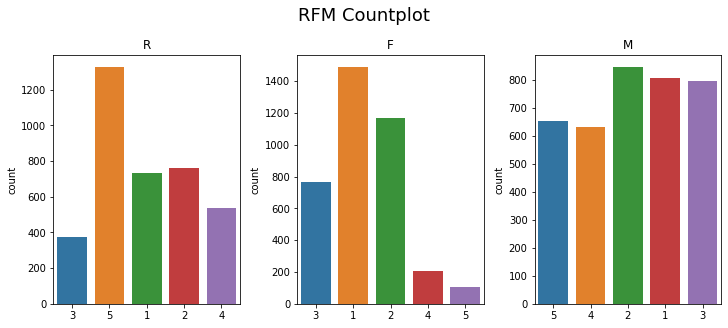

In [31]:
RFM_only = data_rfm[['R','F','M']]

fig,ax = plt.subplots(1,3,figsize=(10,4),constrained_layout = True)
fig.suptitle("RFM Countplot", fontsize=18, y=1.1)


for c,ax in zip(RFM_only,ax.ravel()):
  p = sns.countplot(c ,data=RFM_only, ax=ax)
  ax.set_title(c.upper())
  #ax.get_legend().remove()
  ax.set_xlabel("")


In [32]:
# Combine F and M score
data_rfm['FM'] = np.round((data_rfm['F'].astype(int) + data_rfm['M'].astype(int))/2).astype(int).astype(str)

In [33]:
data_rfm['FM-R Score'] = data_rfm['FM'].map(str) + data_rfm['R'].map(str) 

In [34]:
RFM_SEGMENT_MAP = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at risk',
    r'[1-2]5': 'can\'t loose',
    r'3[1-2]': 'about to sleep',
    r'33': 'need attention',
    r'[3-4][4-5]': 'loyal customers',
    r'41': 'promising',
    r'51': 'new customers',
    r'[4-5][2-3]': 'potential loyalists',
    r'5[4-5]': 'champions'
}

data_rfm['Segment'] = data_rfm['R'].map(str) + data_rfm['FM'].map(str)
data_rfm['Segment'] = data_rfm['Segment'].replace(RFM_SEGMENT_MAP, regex=True)
data_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM Score,FM,FM-R Score,Segment
0,12347,70,5,2790.86,3,3,5,335,4,43,loyal customers
1,12348,16,4,1797.24,5,3,4,534,4,45,champions
2,12350,250,1,334.40,1,1,2,112,2,21,hibernating
3,12352,12,7,2194.31,5,3,5,535,4,45,champions
4,12353,144,1,89.00,2,1,1,211,1,12,hibernating


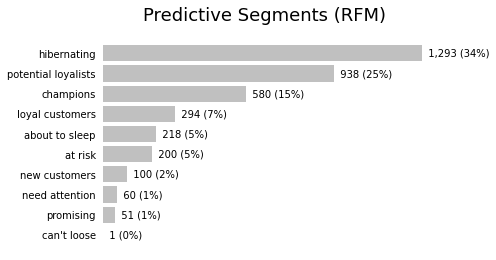

In [35]:
segments_counts = data_rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '  {:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )
        
fig.suptitle("Predictive Segments (RFM)", fontsize=18)
plt.show()

#KMeans Clustering

In [36]:
data_model = data_rfm.copy()
data_model = data_model[["Recency","Frequency","Monetary"]]
data_model

,Recency,Frequency,Monetary
0,70,5,2790.86
1,16,4,1797.24
2,250,1,334.40
3,12,7,2194.31
4,144,1,89.00
...,...,...,...
3730,218,1,180.60
3731,121,1,80.82
3732,67,1,100.21
3733,36,10,1120.67


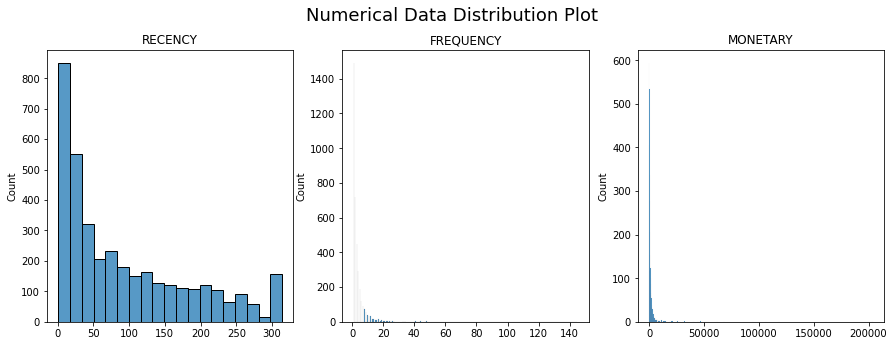

In [37]:
fig,ax = plt.subplots(1,3,figsize=(15,5))
#plt.subplots_adjust(hspace=0.3)
fig.suptitle("Numerical Data Distribution Plot", fontsize=18, y=1)

for n,ax in zip(data_model.columns,ax.ravel()):
  p = sns.histplot(data_model[n], ax=ax, fill=True)
  ax.set_title(n.upper())
  #ax.get_legend().remove()
  ax.set_xlabel("")

In [38]:
data_model.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,3735.0,93.447657,88.878647,1.0,19.000,61.00,152.000,314.00
Frequency,3735.0,3.674699,6.258615,1.0,1.000,2.00,4.000,145.00
Monetary,3735.0,1718.639184,7152.424200,2.9,289.355,603.37,1454.725,203948.19


In [39]:
# Normalization using minmaxscaler
#x_array = np.array(data_model)
scaler = MinMaxScaler()
x_scaled =data_model.copy()
x_scaled[x_scaled.columns] = scaler.fit_transform(x_scaled)

<h3> Elbow Plot </h3>

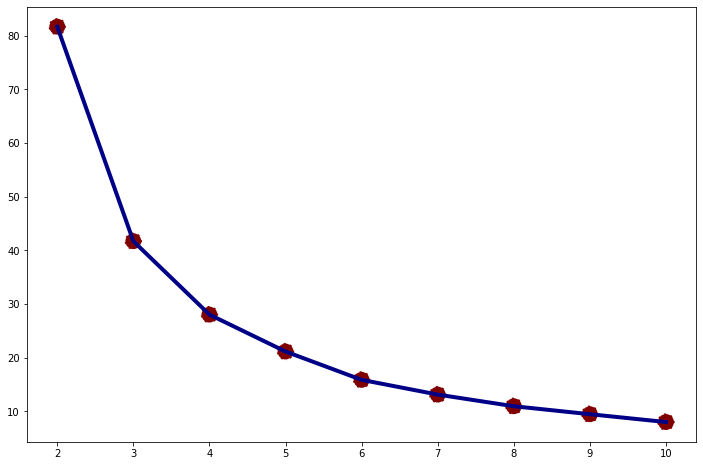

In [40]:
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(12,8))
#plt.plot(inertia, 'bx-')

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


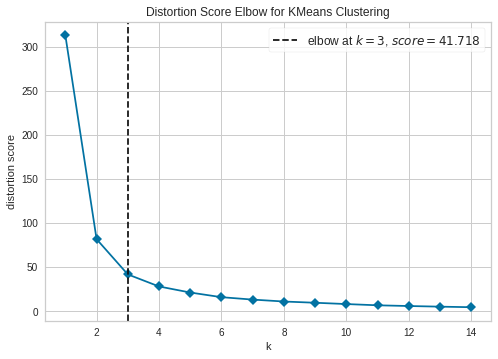

In [41]:
# Alternatif Elbow Plot
from yellowbrick.cluster import KElbowVisualizer

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15), timings= False)
visualizer.fit(x_scaled)        
visualizer.show()               

## 3 Clusters K-Means

In [42]:
model_kmeans = KMeans(n_clusters=3,random_state=0)
model_kmeans.fit(x_scaled)
k_means_cluster = model_kmeans.predict(x_scaled)

In [43]:
data_cluster = data_model.copy()
data_cluster["cluster"] = k_means_cluster

In [44]:
data_cluster

,Recency,Frequency,Monetary,cluster
0,70,5,2790.86,0
1,16,4,1797.24,0
2,250,1,334.40,1
3,12,7,2194.31,0
4,144,1,89.00,2
...,...,...,...,...
3730,218,1,180.60,1
3731,121,1,80.82,2
3732,67,1,100.21,0
3733,36,10,1120.67,0


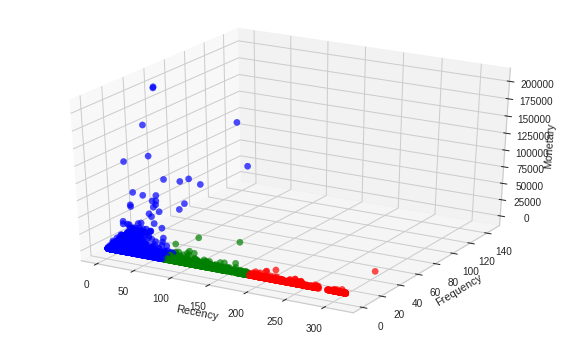

In [45]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

r = data_cluster["Recency"]
f = data_cluster["Frequency"]
m = data_cluster["Monetary"]
c = data_cluster["cluster"]

color_dict={0:"blue",
          1:"red",
          2:"green"}

cm = ListedColormap([color_dict[x] for x in color_dict.keys()])

sc = ax.scatter(r, f, m, s=40, c=c,cmap=cm, marker='o', alpha=0.7)

plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
plt.show()

In [46]:
centroids = scaler.inverse_transform(model_kmeans.cluster_centers_)
centroids

array([[2.69297481e+01, 5.16618217e+00, 2.57549942e+03],
       [2.47799127e+02, 1.36244541e+00, 4.22762329e+02],
       [1.25209350e+02, 2.16056911e+00, 8.26065885e+02]])

In [47]:
data_cluster.groupby("cluster")['Recency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,2065.0,26.953995,20.465544,1.0,11.0,21.0,40.0,77.0
1,1,687.0,247.799127,40.928372,187.0,210.0,243.0,291.0,314.0
2,2,983.0,125.258393,31.759604,76.0,97.0,123.0,152.0,186.0


In [48]:
data_cluster.groupby("cluster")['Frequency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,2065.0,5.168523,7.986342,1.0,2.0,3.0,6.0,145.0
1,1,687.0,1.362445,1.497691,1.0,1.0,1.0,1.0,34.0
2,2,983.0,2.152594,1.601651,1.0,1.0,2.0,3.0,12.0


In [49]:
data_cluster.groupby("cluster")['Monetary'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,2065.0,2575.324520,9408.553879,5.90,460.410,994.31,2132.670,203948.19
1,1,687.0,422.762329,610.394822,3.75,157.055,271.05,439.515,7832.47
2,2,983.0,824.653612,2165.117776,2.90,227.925,446.11,872.390,44534.30


In [50]:
data_cluster.groupby("cluster").agg(['mean','median']).reset_index()

cluster     Recency        Frequency            Monetary        
                 mean median      mean median         mean  median
0       0   26.953995   21.0  5.168523    3.0  2575.324520  994.31
1       1  247.799127  243.0  1.362445    1.0   422.762329  271.05
2       2  125.258393  123.0  2.152594    2.0   824.653612  446.11

- cluster 0: has a lowest recency, highest frequency, and highest monetary. It means that this cluster is actively shopping with a biggest amount of money

- cluster 1: has a highest recency, lowest frequency, and lowest monetary. It means that this cluster is passively shopping with a lowest amount of money (churn customer)

- cluster 2: this cluster is a middle-class, between cluster 0 and 1

## 4 Clusters K-Means

In [51]:
model_kmeans = KMeans(n_clusters=4,random_state=0)
model_kmeans.fit(x_scaled)
k_means_cluster = model_kmeans.predict(x_scaled)

In [52]:
data_cluster = data_model.copy()
data_cluster["cluster"] = k_means_cluster

In [53]:
data_cluster

,Recency,Frequency,Monetary,cluster
0,70,5,2790.86,3
1,16,4,1797.24,0
2,250,1,334.40,1
3,12,7,2194.31,0
4,144,1,89.00,2
...,...,...,...,...
3730,218,1,180.60,2
3731,121,1,80.82,3
3732,67,1,100.21,3
3733,36,10,1120.67,0


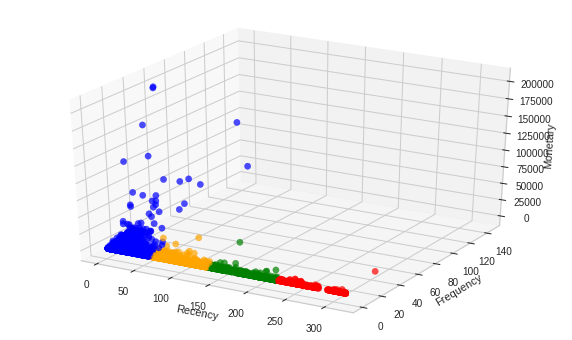

In [54]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')

r = data_cluster["Recency"]
f = data_cluster["Frequency"]
m = data_cluster["Monetary"]
c = data_cluster["cluster"]

color_dict={0:"blue",
          1:"red",
          2:"green",
          3:"orange"}

cm = ListedColormap([color_dict[x] for x in color_dict.keys()])

sc = ax.scatter(r, f, m, s=40, c=c,cmap=cm, marker='o', alpha=0.7)

plt.xlabel("Recency")
plt.ylabel("Frequency")
ax.set_zlabel('Monetary')
plt.show()

In [55]:
centroids = scaler.inverse_transform(model_kmeans.cluster_centers_)
centroids

array([[2.18805237e+01, 5.45062739e+00, 2.74999769e+03],
       [2.73470726e+02, 1.31850117e+00, 3.93214262e+02],
       [1.78272300e+02, 1.63380282e+00, 6.17354477e+02],
       [9.35789474e+01, 2.54425837e+00, 9.76052141e+02]])

In [56]:
data_cluster.groupby("cluster")['Recency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,1840.0,22.014130,15.582293,1.0,9.00,18.0,33.0,57.0
1,1,427.0,273.470726,29.640268,226.0,249.00,270.0,305.0,314.0
2,2,638.0,178.338558,26.458310,136.0,153.25,179.0,202.0,225.0
3,3,830.0,93.938554,22.085803,58.0,74.00,92.0,113.0,136.0


In [57]:
data_cluster.groupby("cluster")['Frequency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,1840.0,5.433696,8.388472,1.0,2.0,3.0,6.0,145.0
1,1,427.0,1.318501,1.736574,1.0,1.0,1.0,1.0,34.0
2,2,638.0,1.630094,1.115540,1.0,1.0,1.0,2.0,12.0
3,3,830.0,2.559036,1.907577,1.0,1.0,2.0,3.0,12.0


In [58]:
data_cluster.groupby("cluster")['Monetary'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,1840.0,2740.743773,9926.584890,5.90,473.0275,1040.345,2250.6450,203948.19
1,1,427.0,393.214262,490.324941,3.75,155.1100,254.030,433.4400,5391.21
2,2,638.0,617.209547,1895.248858,2.90,195.5000,328.180,630.6500,44534.30
3,3,830.0,981.285096,2061.493039,9.20,277.8850,550.285,1088.9975,39916.50


In [59]:
data_cluster.groupby("cluster").agg(['mean','median']).reset_index()

cluster     Recency        Frequency            Monetary          
                 mean median      mean median         mean    median
0       0   22.014130   18.0  5.433696    3.0  2740.743773  1040.345
1       1  273.470726  270.0  1.318501    1.0   393.214262   254.030
2       2  178.338558  179.0  1.630094    1.0   617.209547   328.180
3       3   93.938554   92.0  2.559036    2.0   981.285096   550.285

- cluster 0: has a second-lowest recency, seconnd-highest frequency, and second-highest monetary. This cluster is below the cluster 2

- cluster 1: has a highest recency, lowest frequency, and lowest monetary. It means that this cluster is passively shopping with lowest amount of money (churn customer)

- cluster 2: has a lowest recency, highest frequency, highest monetary. It means that this cluster is actively shopping with a highest amount of money (champion customer)

- cluster 3: has a second-highest recency, second-lowest frequency, and second-lowest monetary. This cluster is a little bit better than cluster 1

## Silhoutte Score

For n_clusters = 2 The average silhouette_score is : 0.6662470811500996
For n_clusters = 3 The average silhouette_score is : 0.6090796122844141
For n_clusters = 4 The average silhouette_score is : 0.5741707479305295
For n_clusters = 5 The average silhouette_score is : 0.5477333673030544


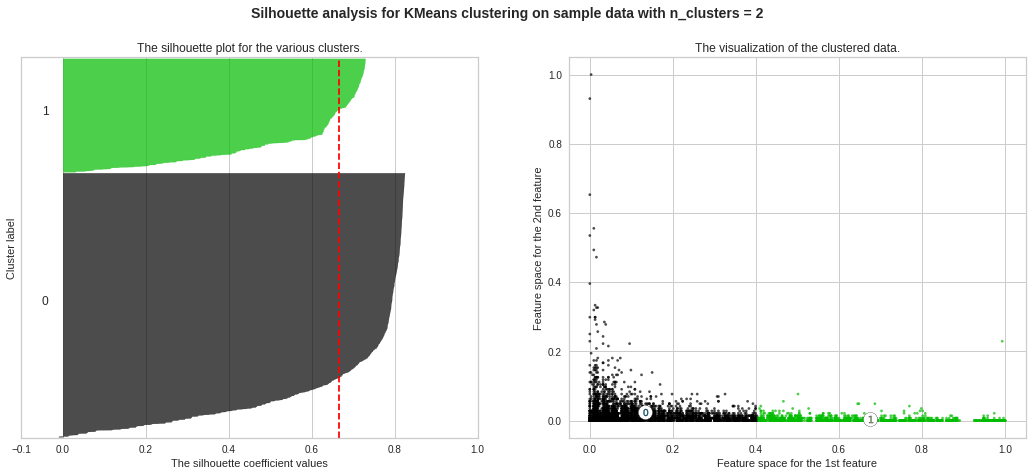

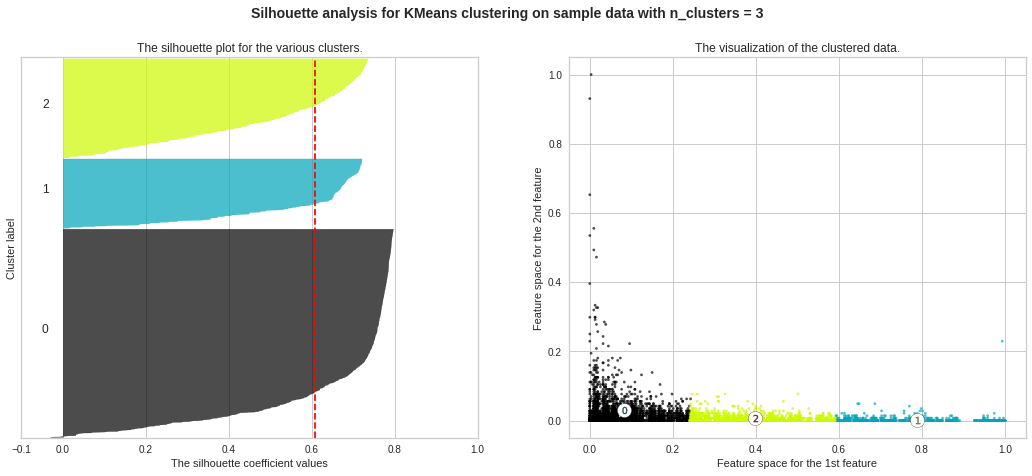

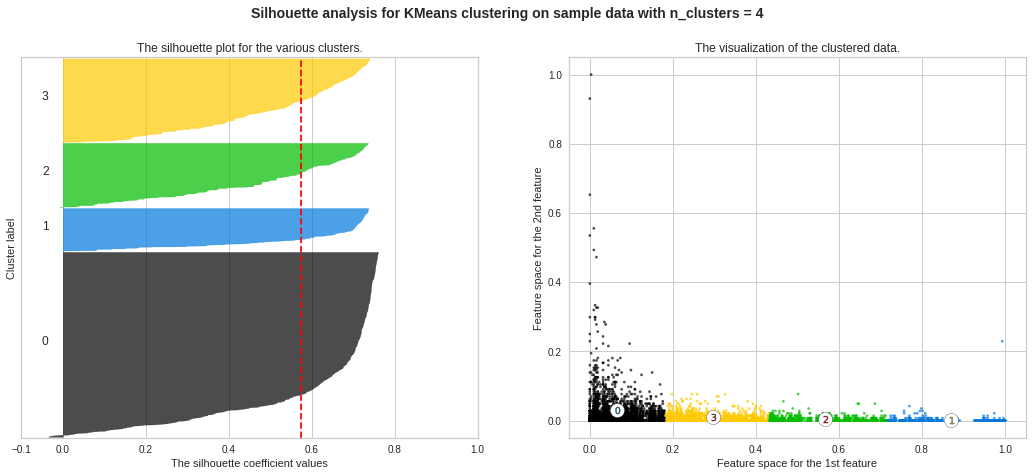

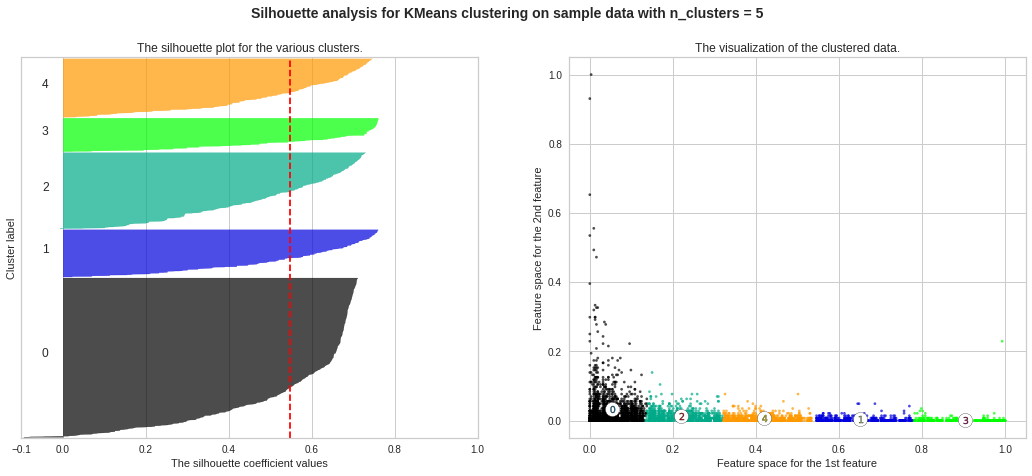

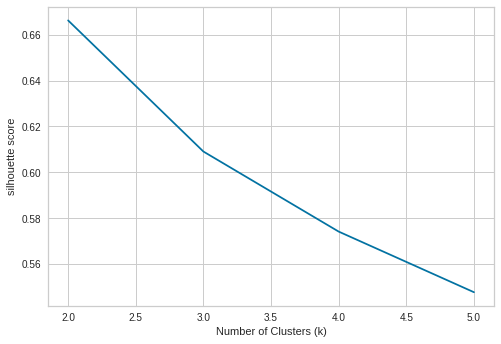

In [60]:
import matplotlib.cm as cm
silhouette_avg_n_clusters = []
range_n_clusters = list(range(2,6))

for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = clusterer.fit_predict(x_scaled)
  silhouette_avg = silhouette_score(x_scaled, cluster_labels)

  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
   
  silhouette_avg_n_clusters.append(silhouette_avg)
  sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(x_scaled.iloc[:, 0], x_scaled.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.6662470811500996
For n_clusters = 3 The average silhouette_score is : 0.6090796122844141
For n_clusters = 4 The average silhouette_score is : 0.5741707479305295
For n_clusters = 5 The average silhouette_score is : 0.5477333673030544


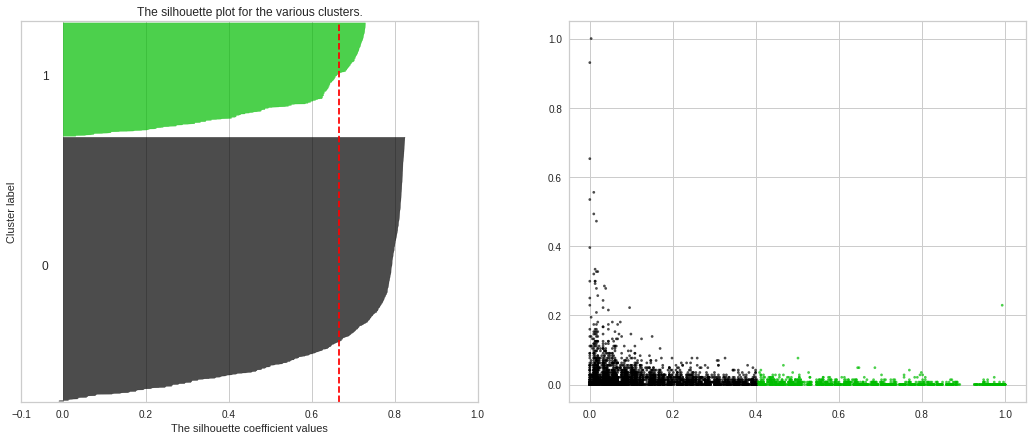

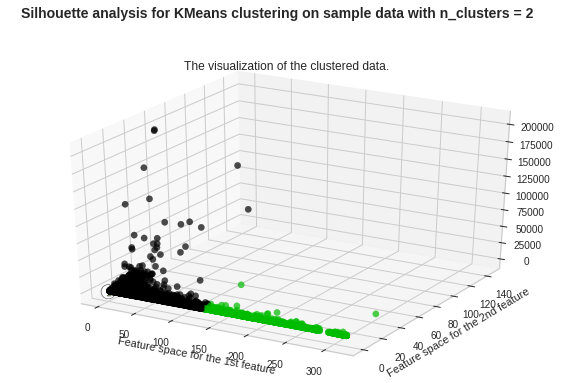

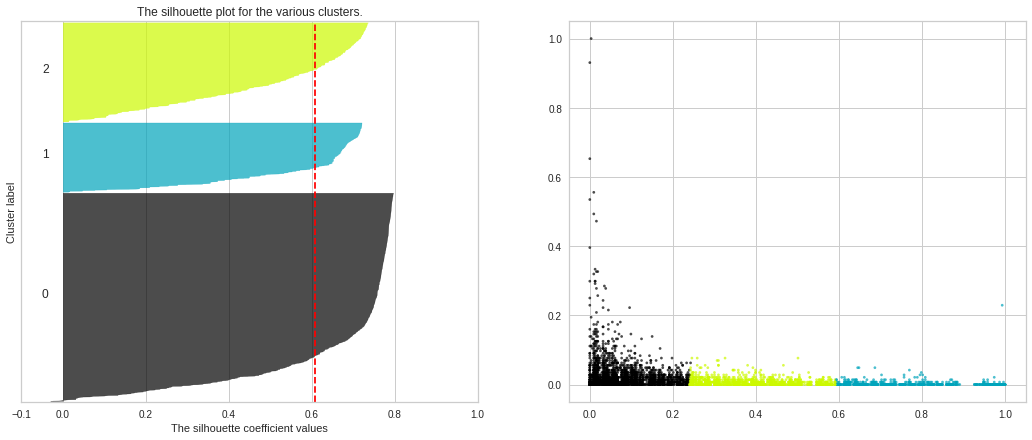

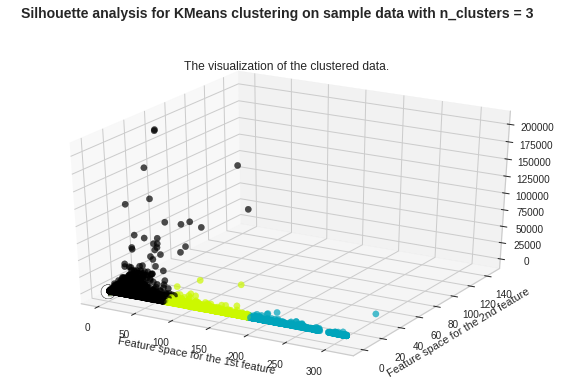

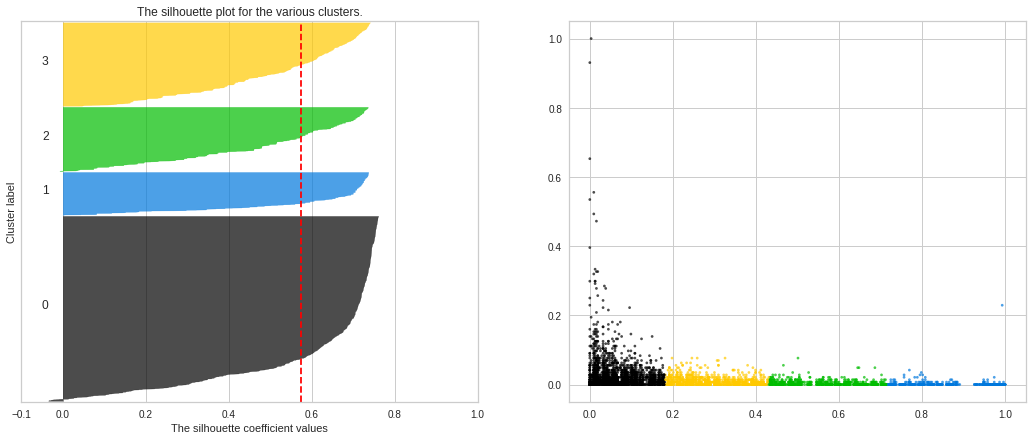

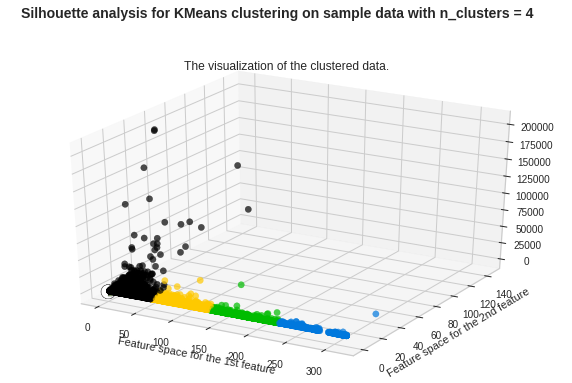

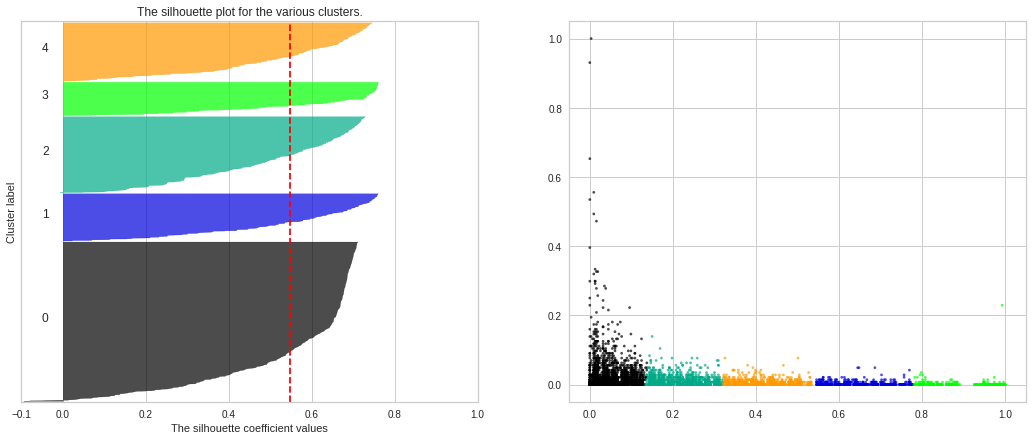

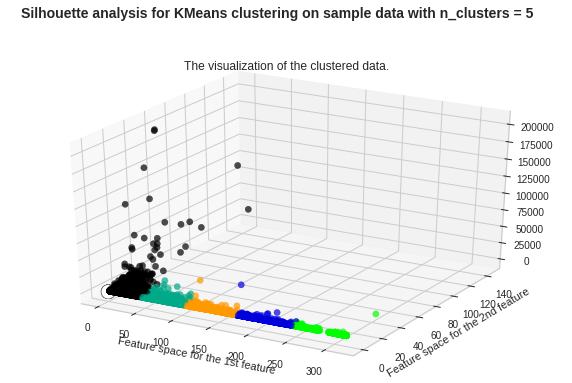

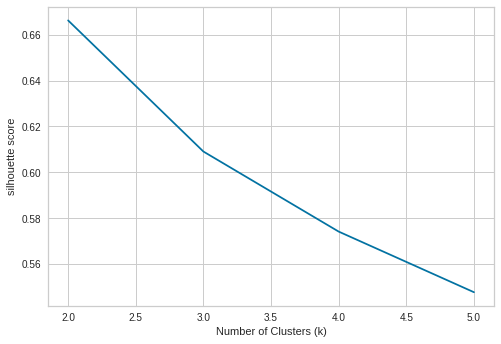

In [61]:
import matplotlib.cm as cm
silhouette_avg_n_clusters = []
range_n_clusters = list(range(2,6))

for n_clusters in range_n_clusters:
  fig, (ax1, ax2) = plt.subplots(1, 2)
  fig.set_size_inches(18, 7)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = clusterer.fit_predict(x_scaled)
  silhouette_avg = silhouette_score(x_scaled, cluster_labels)

  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
   
  silhouette_avg_n_clusters.append(silhouette_avg)
  sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2.scatter(x_scaled.iloc[:, 0], x_scaled.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
  fig = plt.figure(figsize=(10,6))
  ax2 = fig.add_subplot(111, projection='3d')

  r = data_cluster["Recency"]
  f = data_cluster["Frequency"]
  m = data_cluster["Monetary"]
  c = data_cluster["cluster"]

  sc = ax2.scatter(r, f, m, s=40, c=colors, marker='o', alpha=0.7)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

## 3 Clusters K-Means without Outliers

In [62]:
data_model2 = data_rfm.copy()

In [63]:
data_model2 = data_model2[["Recency","Frequency","Monetary"]]

In [64]:
data_model2

,Recency,Frequency,Monetary
0,70,5,2790.86
1,16,4,1797.24
2,250,1,334.40
3,12,7,2194.31
4,144,1,89.00
...,...,...,...
3730,218,1,180.60
3731,121,1,80.82
3732,67,1,100.21
3733,36,10,1120.67


<h3> Removing Outliers </h3>

In [65]:
#Outliers

#data_model2 = data_model2[data_model2["Frequency"] <= 3 * np.std(data_model2["Frequency"])]
#data_model2 = data_model2[data_model2["Monetary"] <= 3 * np.std(data_model2["Monetary"])]

In [66]:
#Outliers using z-score

from scipy import stats
data_model2 = data_model2[(np.abs(stats.zscore(data_model2)) < 3).all(axis=1)]

<h3> Features Scaling </h3>

In [67]:
# Proses Scaling Min-Max

x_array = np.array(data_model2)
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x_array)

<h3> Elbow Plot </h3>

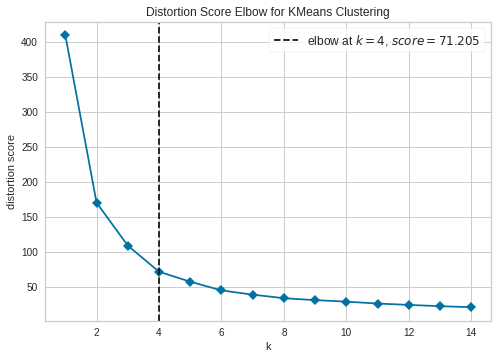

In [68]:
# Plot Elbow

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,15), timings= False)
visualizer.fit(x_scaled)      
visualizer.show()              

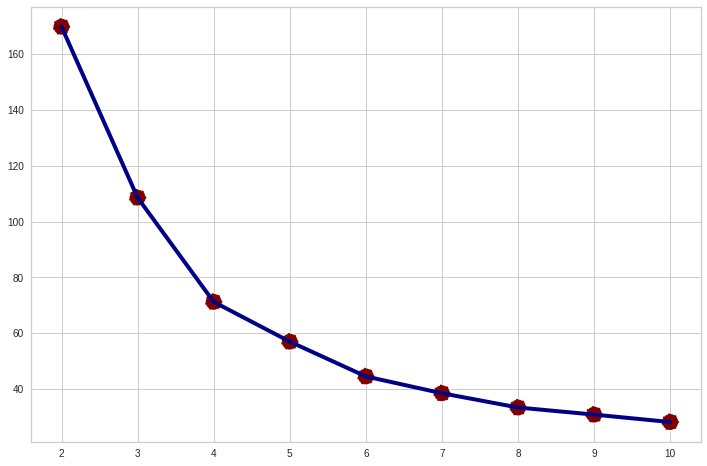

In [69]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(x_scaled)
    inertia.append(kmeans.inertia_)



plt.figure(figsize=(12, 8))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='#800000',  linestyle='--')


In [70]:
model_kmeans = KMeans(n_clusters=3,random_state=0)
model_kmeans.fit(x_scaled)
k_means_cluster = model_kmeans.predict(x_scaled)

In [71]:
data_cluster2 = data_model2.copy()
data_cluster2["cluster"] = k_means_cluster

In [72]:
data_cluster2

,Recency,Frequency,Monetary,cluster
0,70,5,2790.86,0
1,16,4,1797.24,0
2,250,1,334.40,1
3,12,7,2194.31,2
4,144,1,89.00,1
...,...,...,...,...
3730,218,1,180.60,1
3731,121,1,80.82,0
3732,67,1,100.21,0
3733,36,10,1120.67,2


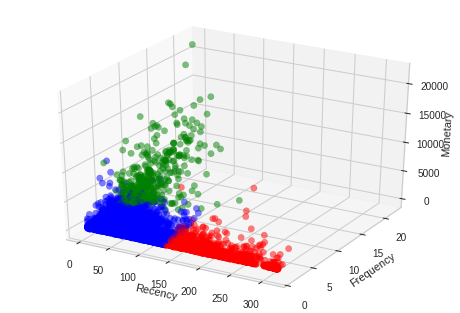

In [73]:
# Plot Cluster 

fig = plt.figure()
ax = fig.gca(projection='3d')

x = data_cluster2["Recency"]
y = data_cluster2["Frequency"]
z = data_cluster2["Monetary"]
c = data_cluster2["cluster"]

col_dict={0:"blue",
          1:"red",
          2:"green"}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

sc = ax.scatter(x, y, z, s=40, c=c,cmap=cm, marker='o', alpha=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

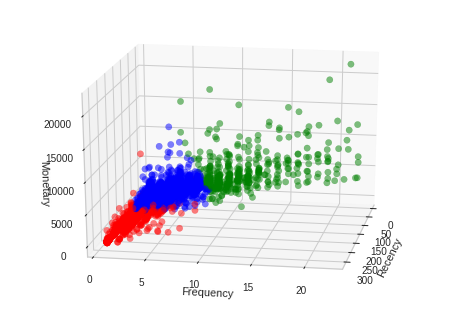

In [74]:
#Adjusting the angle

fig = plt.figure()
ax = fig.gca(projection='3d')

x = data_cluster2["Recency"]
y = data_cluster2["Frequency"]
z = data_cluster2["Monetary"]
c = data_cluster2["cluster"]

col_dict={0:"blue",
          1:"red",
          2:"green"}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

sc = ax.scatter(x, y, z, s=40, c=c,cmap=cm, marker='o', alpha=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

angle1 = 20
angle2 = 10
ax.view_init(angle1 , angle2)

plt.show()

In [75]:
centroids = scaler.inverse_transform(model_kmeans.cluster_centers_)
centroids

array([[4.81660550e+01, 2.58623853e+00, 9.48204818e+02],
       [2.14237397e+02, 1.45554537e+00, 4.75219396e+02],
       [2.25601966e+01, 1.07297297e+01, 4.33556410e+03]])

In [76]:
data_cluster2.groupby("cluster")['Recency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,2180.0,48.166055,37.646784,1.0,15.75,36.0,77.0,133.0
1,1,1091.0,214.237397,55.210535,130.0,167.00,207.0,256.0,314.0
2,2,407.0,22.560197,22.653542,1.0,7.00,15.0,30.0,158.0


In [77]:
data_cluster2.groupby("cluster")['Frequency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,2180.0,2.586239,1.564403,1.0,1.0,2.0,4.0,8.0
1,1,1091.0,1.455545,0.904927,1.0,1.0,1.0,2.0,8.0
2,2,407.0,10.729730,3.847547,4.0,8.0,9.0,12.0,22.0


In [78]:
data_cluster2.groupby("cluster")['Monetary'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,2180.0,948.204818,954.412979,5.9,331.105,657.85,1260.7175,11072.67
1,1,1091.0,475.219396,632.399326,2.9,170.830,306.18,536.8550,9864.26
2,2,407.0,4335.564103,3093.029310,694.4,2225.100,3313.79,5459.0450,21810.42


In [79]:
data_cluster2.groupby("cluster").agg(['mean','median']).reset_index()

cluster     Recency         Frequency            Monetary         
                 mean median       mean median         mean   median
0       0   48.166055   36.0   2.586239    2.0   948.204818   657.85
1       1  214.237397  207.0   1.455545    1.0   475.219396   306.18
2       2   22.560197   15.0  10.729730    9.0  4335.564103  3313.79

## 4 Clusters K-Kmeans without Outliers

In [80]:
model_kmeans = KMeans(n_clusters=4,random_state=0)
model_kmeans.fit(x_scaled)
k_means_cluster = model_kmeans.predict(x_scaled)

In [81]:
data_cluster2 = data_model2.copy()
data_cluster2["cluster"] = k_means_cluster

In [82]:
data_cluster2

,Recency,Frequency,Monetary,cluster
0,70,5,2790.86,2
1,16,4,1797.24,2
2,250,1,334.40,3
3,12,7,2194.31,2
4,144,1,89.00,0
...,...,...,...,...
3730,218,1,180.60,3
3731,121,1,80.82,0
3732,67,1,100.21,2
3733,36,10,1120.67,1


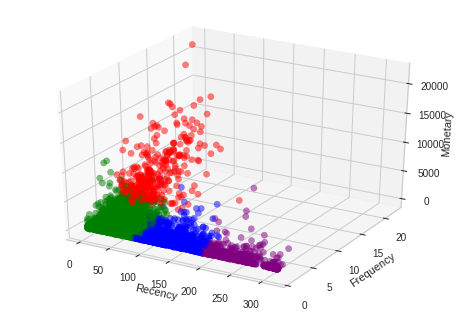

In [83]:
# Plot Cluster

fig = plt.figure()
ax = fig.gca(projection='3d')

x = data_cluster2["Recency"]
y = data_cluster2["Frequency"]
z = data_cluster2["Monetary"]
c = data_cluster2["cluster"]

col_dict={0:"blue",
          1:"red",
          2:"green",
          3:"purple"}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

sc = ax.scatter(x, y, z, s=40, c=c,cmap=cm, marker='o', alpha=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

plt.show()

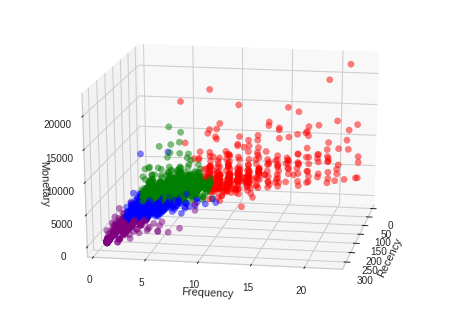

In [84]:
# adjusting the angle

fig = plt.figure()
ax = fig.gca(projection='3d')

x = data_cluster2["Recency"]
y = data_cluster2["Frequency"]
z = data_cluster2["Monetary"]
c = data_cluster2["cluster"]

col_dict={0:"blue",
          1:"red",
          2:"green",
          3:"purple"}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])

sc = ax.scatter(x, y, z, s=40, c=c,cmap=cm, marker='o', alpha=0.5)

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')

angle1 = 20
angle2 = 10
ax.view_init(angle1 , angle2)

plt.show()

In [85]:
centroids = scaler.inverse_transform(model_kmeans.cluster_centers_)
centroids

array([[1.31848518e+02, 1.92206367e+00, 6.20198036e+02],
       [2.20140845e+01, 1.12845070e+01, 4.60887789e+03],
       [3.15501710e+01, 2.83637400e+00, 1.06933506e+03],
       [2.50226444e+02, 1.30851064e+00, 4.15440258e+02]])

In [86]:
data_cluster2.groupby("cluster")['Recency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,912.0,131.797149,30.847621,79.0,106.0,128.0,156.0,193.0
1,1,354.0,22.062147,21.966278,1.0,7.0,15.0,30.0,158.0
2,2,1754.0,31.504561,22.956424,1.0,13.0,26.0,49.0,90.0
3,3,658.0,250.226444,39.834155,191.0,215.0,246.0,293.0,314.0


In [87]:
data_cluster2.groupby("cluster")['Frequency'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,912.0,1.924342,1.228003,1.0,1.0,2.0,2.0,9.0
1,1,354.0,11.296610,3.805414,5.0,8.0,10.0,13.0,22.0
2,2,1754.0,2.838084,1.729582,1.0,1.0,2.0,4.0,8.0
3,3,658.0,1.308511,0.826108,1.0,1.0,1.0,1.0,8.0


In [88]:
data_cluster2.groupby("cluster")['Monetary'].describe().reset_index()

,cluster,count,mean,std,min,25%,50%,75%,max
0,0,912.0,620.381635,722.504240,2.90,215.8575,400.20,742.6650,9864.26
1,1,354.0,4614.247288,3179.086641,694.40,2471.7325,3711.11,5892.2350,21810.42
2,2,1754.0,1070.429973,1035.262055,5.90,384.0525,753.34,1431.4075,11072.67
3,3,658.0,415.440258,589.492713,3.75,155.6225,266.59,427.7850,7832.47


In [89]:
data_cluster2.groupby("cluster").agg(['mean','median']).reset_index()

cluster     Recency         Frequency            Monetary         
                 mean median       mean median         mean   median
0       0  131.797149  128.0   1.924342    2.0   620.381635   400.20
1       1   22.062147   15.0  11.296610   10.0  4614.247288  3711.11
2       2   31.504561   26.0   2.838084    2.0  1070.429973   753.34
3       3  250.226444  246.0   1.308511    1.0   415.440258   266.59

- cluster 0: has the second-highest recency, second-lowest frequency and second-lowest monetary. We should increase the customer's recency.

- cluster 1: has lowest recency and has the highest frequency and monetary. This is the most active user with the highest monetary.

- cluster 2: has the second-lowest recency, second highest frequency and monetary. We can increase the customer's frequency or the customer's monetary because it already has a low recency (active user).

- cluster 3: has the highest recency and has the lowest frequency and monetary. This is the most passive user


## Silhoutte Score without Outliers

For n_clusters = 2 The average silhouette_score is : 0.5459180371972966
For n_clusters = 3 The average silhouette_score is : 0.5191103190818691
For n_clusters = 4 The average silhouette_score is : 0.4869188834570664
For n_clusters = 5 The average silhouette_score is : 0.45400804849040644


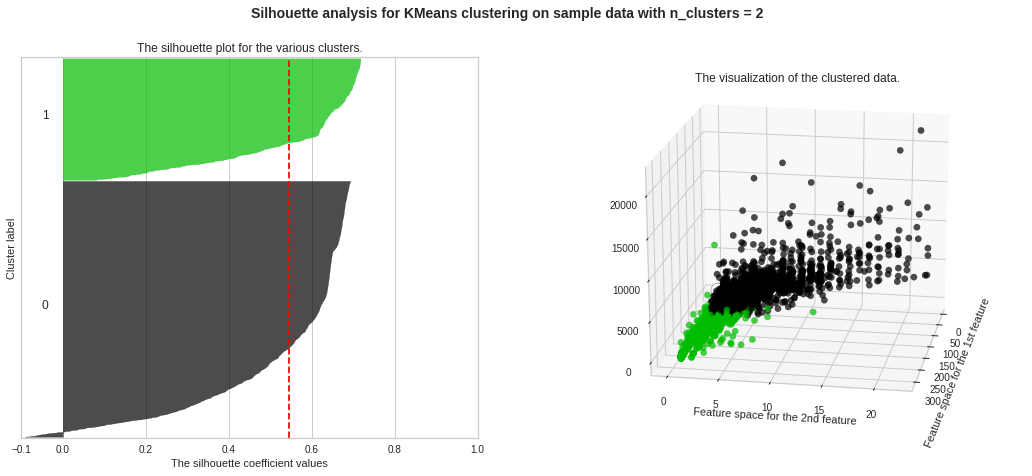

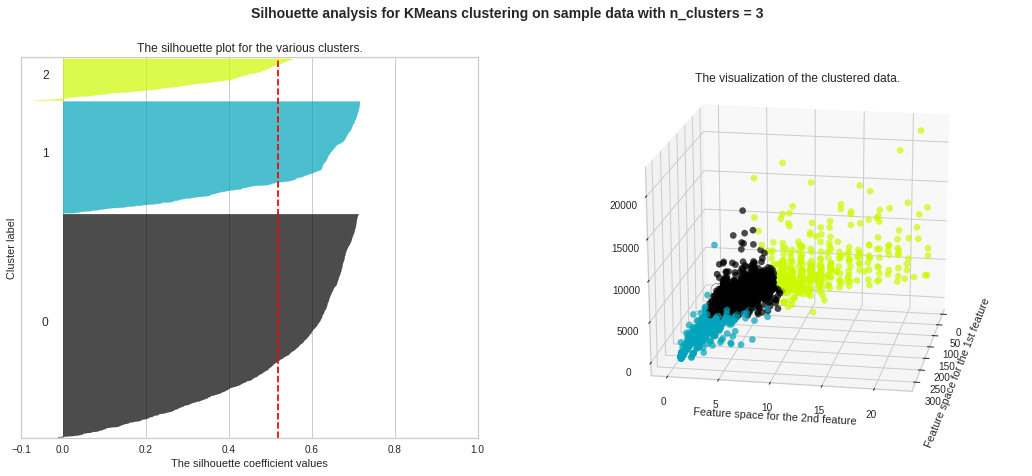

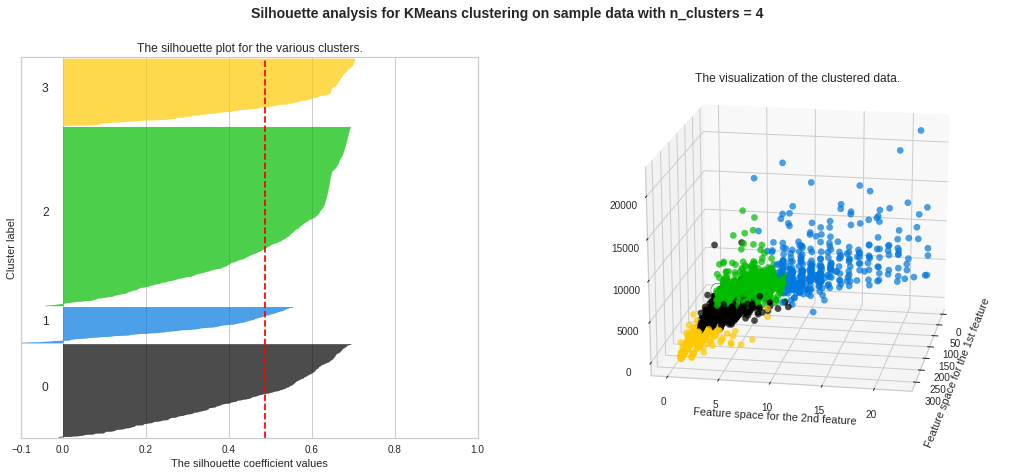

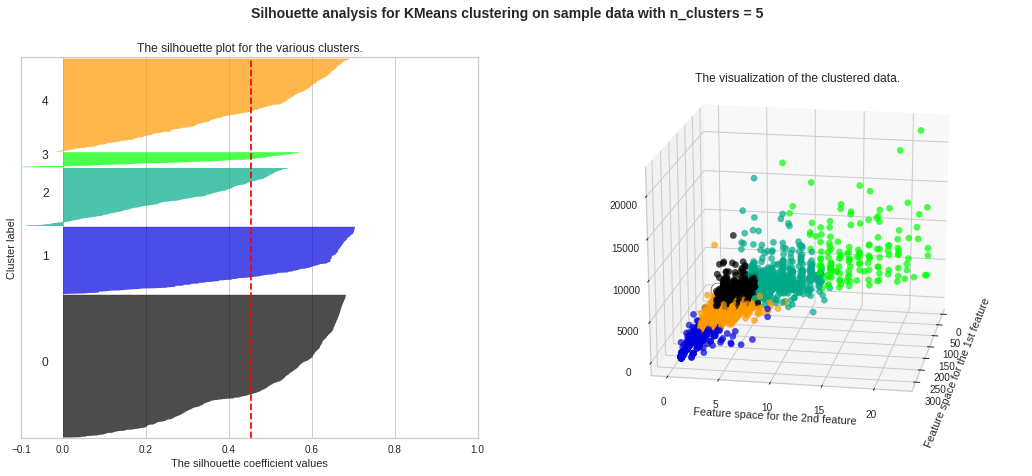

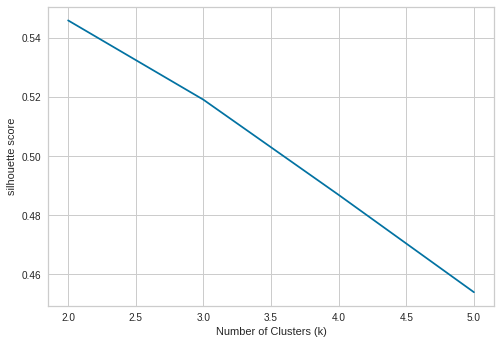

In [90]:
import matplotlib.cm as cm
silhouette_avg_n_clusters = []
range_n_clusters = list(range(2,6))

for n_clusters in range_n_clusters:
  fig = plt.figure(figsize=(18,7))
  ax1 = fig.add_subplot(121)

  ax1.set_xlim([-0.1, 1])
  ax1.set_ylim([0, len(x_scaled) + (n_clusters + 1) * 10])

  clusterer = KMeans(n_clusters=n_clusters, random_state=0)
  cluster_labels = clusterer.fit_predict(x_scaled)
  silhouette_avg = silhouette_score(x_scaled, cluster_labels)

  print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
   
  silhouette_avg_n_clusters.append(silhouette_avg)
  sample_silhouette_values = silhouette_samples(x_scaled, cluster_labels)

  y_lower = 10
  for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    y_lower = y_upper + 10  # 10 for the 0 samples

  ax1.set_title("The silhouette plot for the various clusters.")
  ax1.set_xlabel("The silhouette coefficient values")
  ax1.set_ylabel("Cluster label")

  ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
  ax1.set_yticks([])  # Clear the yaxis labels / ticks
  ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

  # 2nd Plot showing the actual clusters formed
  colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
  ax2 = fig.add_subplot(122, projection='3d')

  r = data_cluster2["Recency"]
  f = data_cluster2["Frequency"]
  m = data_cluster2["Monetary"]
  c = data_cluster2["cluster"]

  angle1 = 20
  angle2 = 10
  ax2.view_init(angle1 , angle2)

  sc = ax2.scatter(r, f, m, s=40, c=colors, marker='o', alpha=0.7)

  # Labeling the clusters
  centers = clusterer.cluster_centers_
  # Draw white circles at cluster centers
  ax2.scatter(centers[:, 0], centers[:, 1], centers[:,2], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

  #for i, c in enumerate(centers):
    #ax2.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    #s=50, edgecolor='k')

  ax2.set_title("The visualization of the clustered data.")
  ax2.set_xlabel("Feature space for the 1st feature")
  ax2.set_ylabel("Feature space for the 2nd feature")

  plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

From silhoutte score perspective, using 4 clusters should be enough to do the customer segmentation.